In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [3]:
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [4]:
demographics = pd.read_excel('../data/DemoData.xlsx')
demographics['tract'] = demographics.ID.astype(str).str.zfill(9)

In [5]:
shp = gp.GeoDataFrame.from_file('../data/merged.json')

shp = shp.merge(demographics, on='tract')

shp.rename(columns={
    'Destination?': 'is_dest',
    'Origin?': 'is_orig',
    'Total Population': 'pop',
    '18 to 24 yrs': '_18_to_24',
    '65 and Above': 'above_65',
    'Median Age': 'age',
    'Non-white': 'nonwhite',
    'English less than "very well"': 'nonenglish',
    'Annaul Individual Income below 10000': 'income_below_10000',
    'Annaul Individual Income below 15000': 'income_below_15000',
    'Median Income': 'income',
    'Below 100 percent of the poverty level': 'below_pov',
    '100 to 149 percent of the poverty level': '_100_149_pov',
    'At or above 150 percent of the poverty level': 'above_150_pov',
    'Citizenship status': 'noncitizen',
    'Place of Birth': 'foreignborn'
}, inplace=True)

ERROR:Fiona:CPLE_OpenFailed in Unable to open EPSG support file gcs.csv.
Try setting the GDAL_DATA environment variable to point to the
directory containing EPSG csv files.


In [7]:
shp.columns

Index([                 u'Both',               u'is_dest',
               u'DollarVanLine',               u'is_orig',
        u'average_commute_time', u'average_walk_distance',
                    u'geometry',                    u'id',
         u'number_of_commuters',                 u'tract',
                          u'ID',             u'Geography',
                         u'pop',             u'_18_to_24',
                    u'above_65',                   u'age',
                    u'nonwhite',            u'nonenglish',
          u'income_below_10000',    u'income_below_15000',
                      u'income',             u'below_pov',
                u'_100_149_pov',         u'above_150_pov',
                  u'noncitizen',           u'foreignborn'],
      dtype='object')

In [8]:
# Standardize Value Range
for c in [
        u'average_commute_time', u'average_walk_distance',
        u'number_of_commuters',u'pop',
                       u'_18_to_24',                    u'above_65',
                         u'age',             u'nonwhite',
                  u'nonenglish',    u'income_below_10000',
          u'income_below_15000',                u'income',
                   u'below_pov',           u'_100_149_pov',
               u'above_150_pov',            u'noncitizen',
                 u'foreignborn'
]:
    shp[c] = ((shp[c] - shp[c].mean())/shp[c].std())

In [9]:
shp.corr()

Both   is_dest  DollarVanLine   is_orig  \
Both                   1.000000  0.870089       0.534989  0.534989   
is_dest                0.870089  1.000000       0.438954  0.438954   
DollarVanLine          0.534989  0.438954       1.000000  1.000000   
is_orig                0.534989  0.438954       1.000000  1.000000   
average_commute_time  -0.043610 -0.118898       0.156067  0.156067   
average_walk_distance -0.060313 -0.115471       0.096075  0.096075   
number_of_commuters    0.006686  0.068330      -0.082529 -0.082529   
ID                    -0.017751 -0.016317       0.110538  0.110538   
pop                    0.002865  0.018927      -0.072669 -0.072669   
_18_to_24              0.006927  0.009786      -0.003109 -0.003109   
above_65              -0.023670 -0.050237       0.020597  0.020597   
age                   -0.003380 -0.015376       0.032922  0.032922   
nonwhite               0.161327  0.116835       0.355080  0.355080   
nonenglish             0.081938  0.042888      -0.036992 -0.036992   
income_below_10000     0.012977 -0.011509       0.003948  0.003948   
income_below_15000     0.019985 -0.012489       0.004351  0.004351   
income                -0.057294  0.025447      -0.106560 -0.106560   
below_pov             -0.007381 -0.026638      -0.067036 -0.067036   
_100_149_pov           0.088641  0.045861       0.052634  0.052634   
above_150_pov         -0.026614  0.003877       0.032709  0.032709   
noncitizen             0.042196  0.008149       0.053647  0.053647   
foreignborn           -0.002459 -0.007336      -0.027960 -0.027960   

                       average_commute_time  average_walk_distance  \
Both                              -0.043610              -0.060313   
is_dest                           -0.118898              -0.115471   
DollarVanLine                      0.156067               0.096075   
is_orig                            0.156067               0.096075   
average_commute_time               1.000000               0.910159   
average_walk_distance              0.910159               1.000000   
number_of_commuters               -0.628965              -0.575758   
ID                                 0.058409               0.104497   
pop                               -0.548126              -0.508703   
_18_to_24                         -0.025455              -0.026185   
above_65                           0.125413               0.081354   
age                                0.177350               0.137742   
nonwhite                           0.241031               0.181515   
nonenglish                         0.044742               0.038080   
income_below_10000                 0.061461               0.058523   
income_below_15000                 0.072504               0.067969   
income                            -0.277354              -0.220821   
below_pov                         -0.090818              -0.068988   
_100_149_pov                      -0.021981              -0.029865   
above_150_pov                      0.078416               0.064318   
noncitizen                         0.118386               0.091691   
foreignborn                        0.020993              -0.000654   

                       number_of_commuters        ID       pop  _18_to_24  \
Both                              0.006686 -0.017751  0.002865   0.006927   
is_dest                           0.068330 -0.016317  0.018927   0.009786   
DollarVanLine                    -0.082529  0.110538 -0.072669  -0.003109   
is_orig                          -0.082529  0.110538 -0.072669  -0.003109   
average_commute_time             -0.628965  0.058409 -0.548126  -0.025455   
average_walk_distance            -0.575758  0.104497 -0.508703  -0.026185   
number_of_commuters               1.000000  0.036592  0.621590  -0.042928   
ID                                0.036592  1.000000 -0.031567  -0.142689   
pop                               0.621590 -0.031567  1.000000   0.007494   
_18_to_24                        -0

In [117]:
mod = smf.ols(formula='is_orig ~ average_commute_time + nonwhite + noncitizen + above_65 + below_pov', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_orig   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     92.31
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.54e-88
Time:                        19:55:35   Log-Likelihood:                -897.37
No. Observations:                2117   AIC:                             1807.
Df Residuals:                    2111   BIC:                             1841.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.2113 

In [120]:
mod = smf.ols(formula='is_dest ~ average_commute_time + nonwhite + income + pop', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                is_dest   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     25.99
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           4.61e-21
Time:                        19:58:58   Log-Likelihood:                -325.66
No. Observations:                2120   AIC:                             661.3
Df Residuals:                    2115   BIC:                             689.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0920 

In [124]:
mod = smf.ols(formula='Both ~ average_commute_time + nonwhite + pop + nonenglish + foreignborn + noncitizen', data = shp).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     16.73
Date:                Mon, 07 Mar 2016   Prob (F-statistic):           6.04e-19
Time:                        20:01:30   Log-Likelihood:                -80.220
No. Observations:                2120   AIC:                             174.4
Df Residuals:                    2113   BIC:                             214.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0712 

<matplotlib.colorbar.Colorbar instance at 0x0000000073471D88>

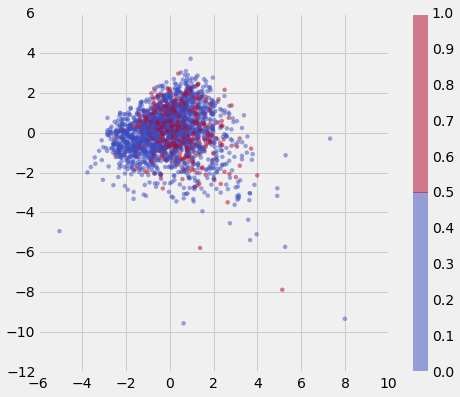

In [148]:
pca = PCA()
X = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn']].values
Xproj = pca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp.dropna()['is_orig'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)

In [149]:
pca.components_

array([[ 0.14144964, -0.25295468,  0.39833753,  0.36777277,  0.44940081,
         0.48258799,  0.43269397],
       [-0.11104776, -0.37032631,  0.3531932 ,  0.1363024 ,  0.43721237,
        -0.51593286, -0.49986165],
       [ 0.81783892,  0.16476315,  0.45226663, -0.19686016, -0.19615579,
        -0.08291518, -0.12386106],
       [ 0.21584483,  0.41181923, -0.26833579,  0.77079684,  0.04748247,
         0.04445866, -0.33682772],
       [-0.2142053 ,  0.76185066,  0.23808244, -0.2091787 ,  0.46682756,
        -0.16234119,  0.1702294 ],
       [-0.45401623,  0.14393185,  0.61477319,  0.20282274, -0.52618805,
         0.20482679, -0.1877282 ],
       [ 0.01400933, -0.03158433,  0.07350684,  0.35831601, -0.2671156 ,
        -0.65097   ,  0.60819393]])

[[  0.           0.           0.           0.         -26.           0.
    0.        ]
 [  0.           0.           0.           0.           0.          21.64093831
   21.56700277]]


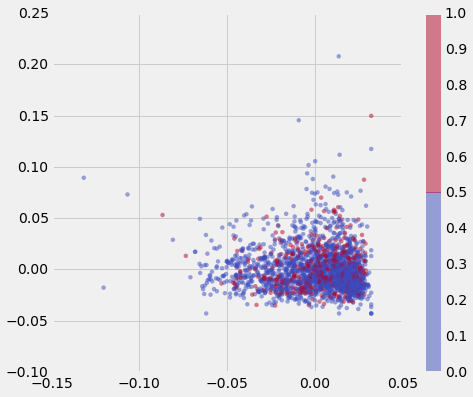

In [155]:
spca = SparsePCA(n_components=2,alpha=20,verbose=False,method='lars')
Xproj = spca.fit_transform(X)
figure, ax = plt.subplots(figsize=(7,6))
s = ax.scatter(Xproj[:, 0], Xproj[:, 1], c=shp.dropna()['is_orig'], edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('coolwarm', 2))
figure.colorbar(s, ax=ax)
print spca.components_

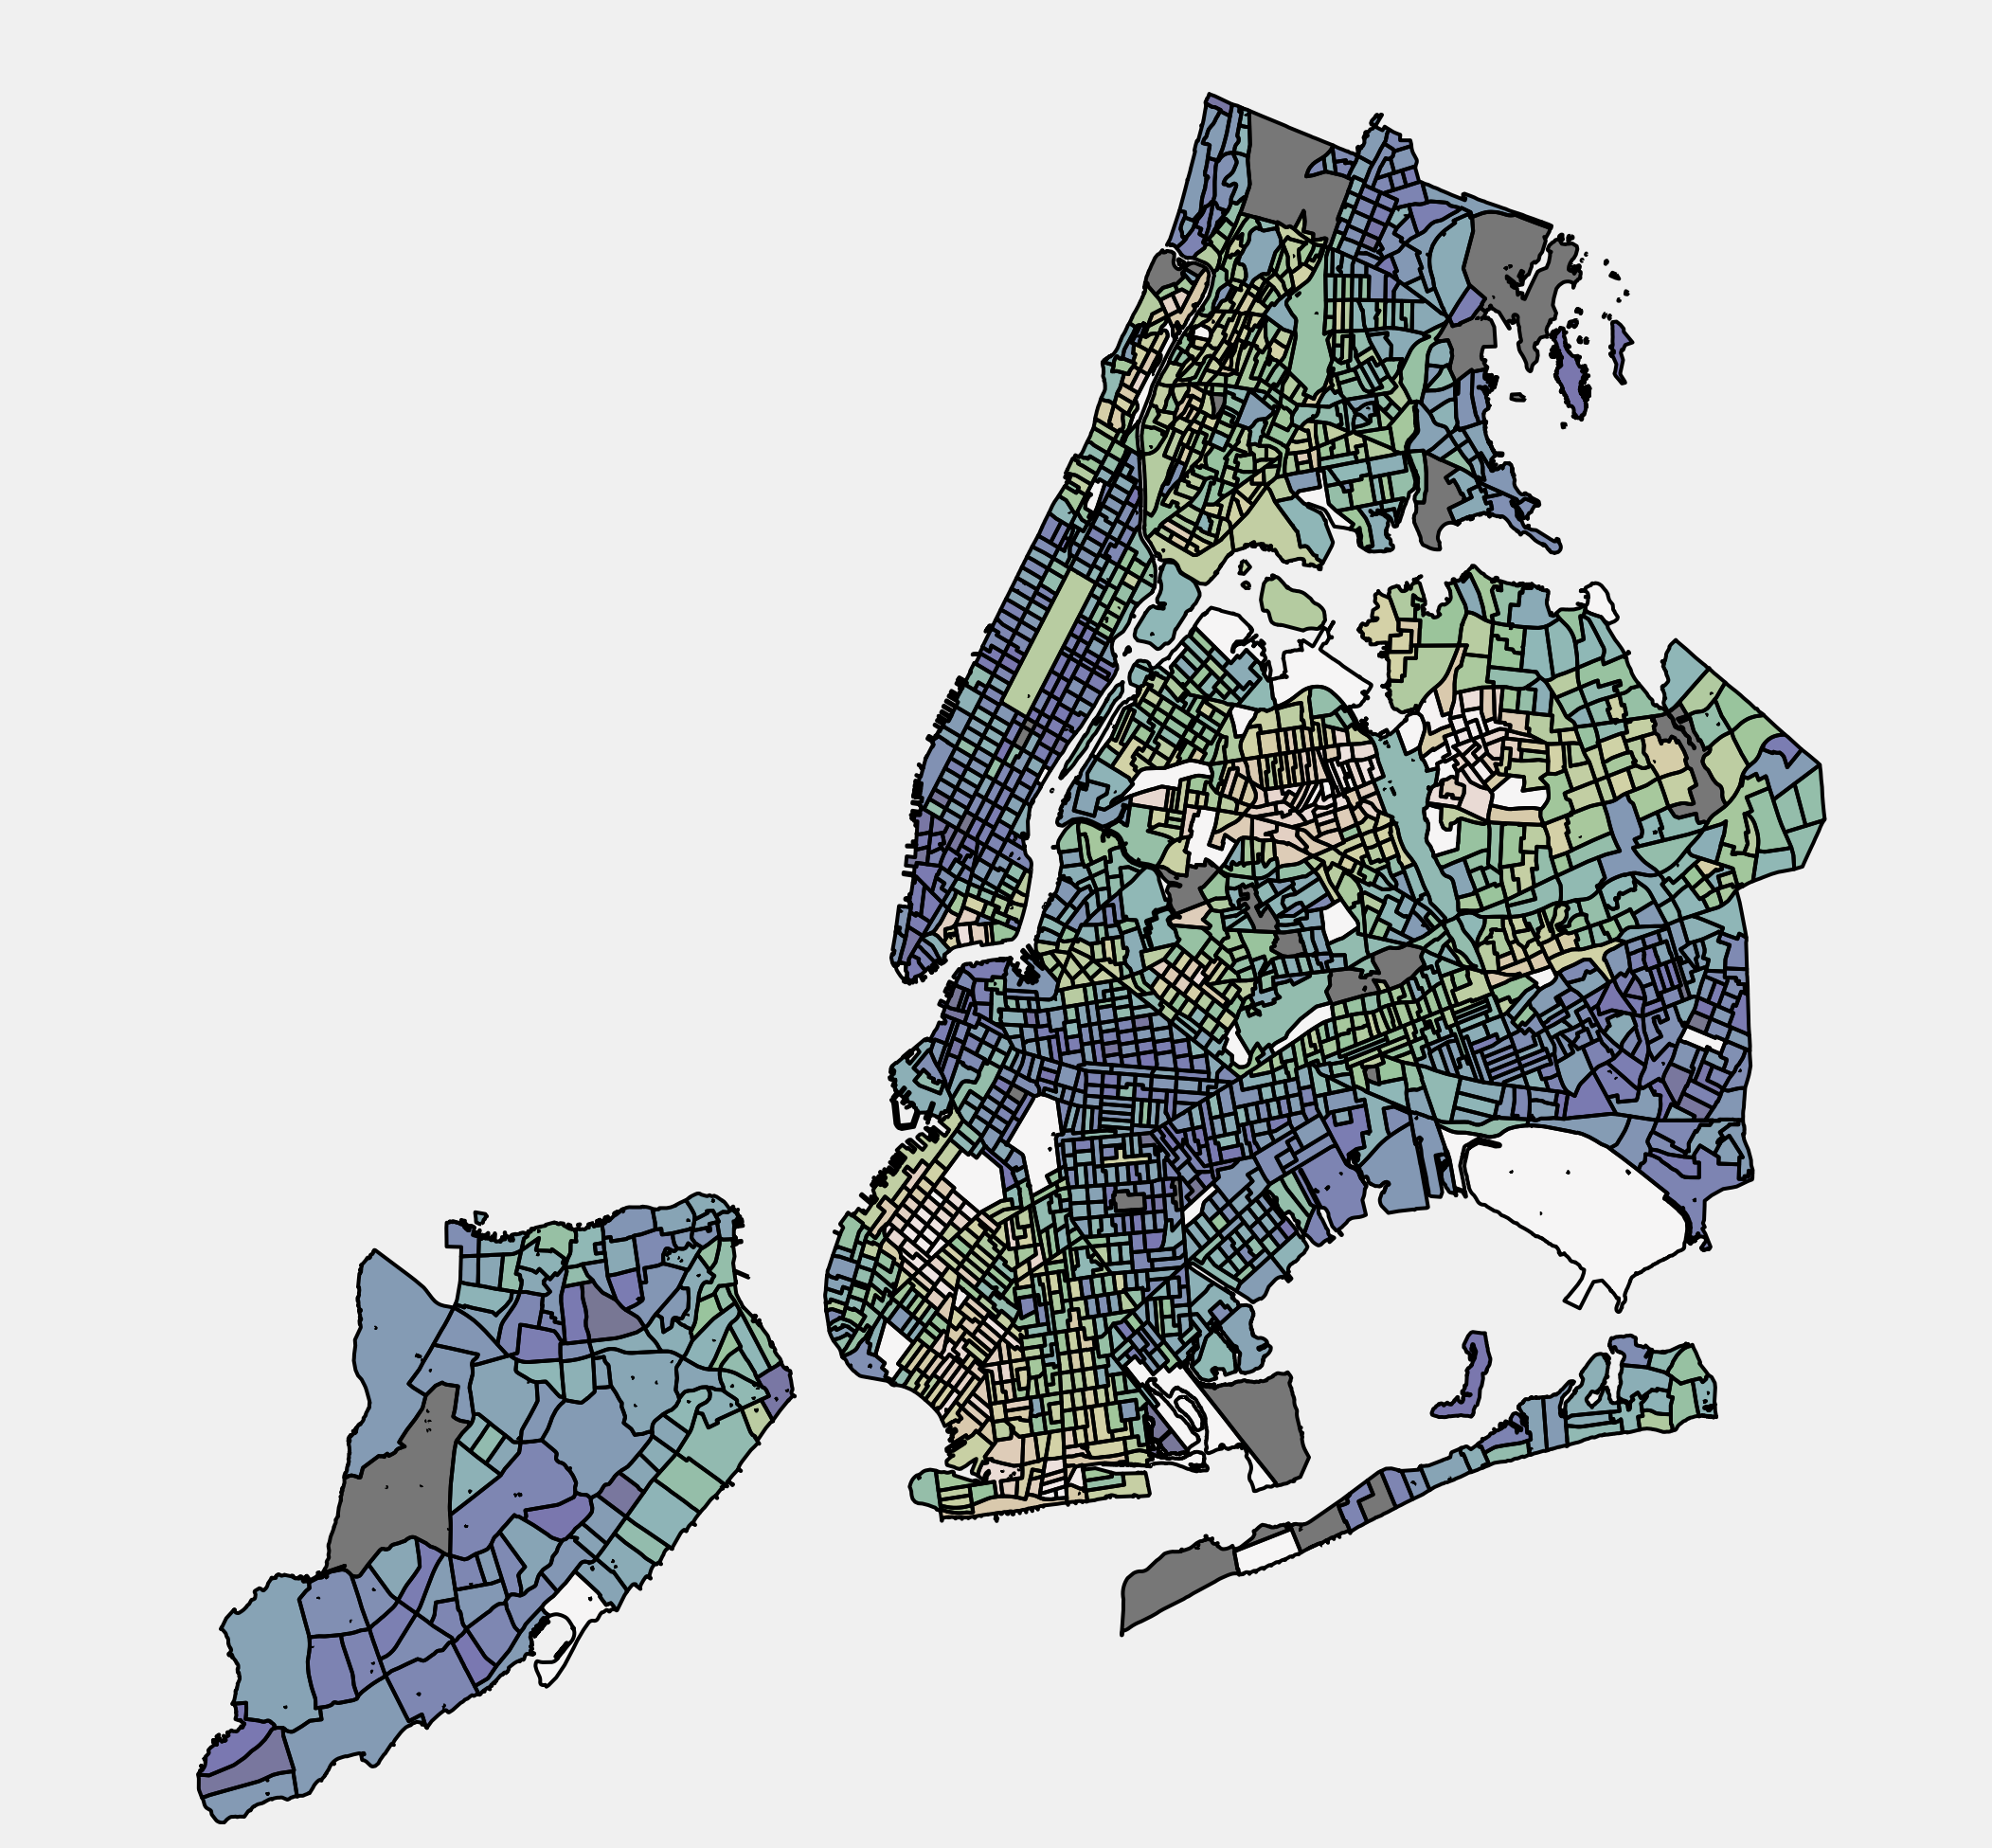

In [30]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='English less than "very well"', colormap='gist_earth')

In [ ]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets.classification import ClassificationDataSet
from pybrain.structure import TanhLayer
from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(7, 10, 1, hiddenclass=TanhLayer)
ds = ClassificationDataSet(7)

data = shp.dropna()[['average_commute_time', 'above_65', 'nonwhite', 'nonenglish', 'below_pov', 'noncitizen', 'foreignborn', 'is_orig']].values
for row in data:
    ds.addSample(row[:7], row[-1])
    
trainer = BackpropTrainer(net, ds)
trainer.trainUntilConvergence()

In [166]:
print data[0]
net.activate(data[0][:7])

[-1.0567124   1.12886513  0.66172267  1.58420992  1.89450981  1.15423605
  0.34366959  1.        ]


array([ 0.74873286])

In [215]:
pred = []
for row in data:
    pred.append(1 if net.activate(row[:7]) > .25 else 0)
    
pred = np.array(pred)

print "% origin classified = ", (pred[data[:,7] == 1].sum())/(data[data[:,7] == 1][:,7].sum())
print "% !origin misclassified = ", (1.*pred[data[:,7] == 0].sum())/(data[data[:,7] == 0][:,7].shape[0])

% origin classified =  0.79418344519
% !origin misclassified =  0.204790419162


In [217]:
net = buildNetwork(17, 20, 1, hiddenclass=TanhLayer)
ds = ClassificationDataSet(17)

data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn',
    'is_orig'
]].values

for row in data:
    ds.addSample(row[:-1], row[-1])

In [ ]:
trainer = BackpropTrainer(net, ds)
trainer.trainUntilConvergence()
""

In [226]:
pred = []
for row in data:
    pred.append(1 if net.activate(row[:-1]) > .1 else 0)
    
pred = np.array(pred)

print "% origin classified = ", (pred[data[:,-1] == 1].sum())/(data[data[:,-1] == 1][:,-1].sum())
print "% !origin misclassified = ", (1.*pred[data[:,-1] == 0].sum())/(data[data[:,-1] == 0][:,-1].shape[0])

% origin classified =  0.89932885906
% !origin misclassified =  0.505389221557


In [253]:
from pybrain.structure.modules import SoftmaxLayer

net = buildNetwork(17, 10, 2, hiddenclass=SoftmaxLayer)
ds = ClassificationDataSet(17)

data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn',
    'is_orig'
]].values

for row in data:
    ds.addSample(row[:-1], row[-1])

ds._convertToOneOfMany()

In [254]:
trainer = BackpropTrainer(net, ds)

In [255]:
trainer.trainUntilConvergence()
""

''

In [256]:
from pybrain.utilities import percentError
percentError(trainer.testOnClassData(), ds['class'])

18.61124232404346

In [18]:
data = shp.dropna()[[
    'average_commute_time', 
    'average_walk_distance',
    'number_of_commuters',
    'pop',
    '_18_to_24',
    'above_65',
    'age',
    'nonwhite',
    'nonenglish',
    'income_below_10000',
    'income_below_15000',
    'income',
    'below_pov',
    '_100_149_pov',
    'above_150_pov',
    'noncitizen',
    'foreignborn'
]].values

target = shp.dropna()['is_orig'].values

In [236]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(data, target)

GaussianNB()

In [237]:
pred = gnb.predict(data)

In [23]:
print data.shape[0], (target != pred).sum()

 2117 691


In [238]:
print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

% origin misclassified = 0.237136465324
% nonorigin misclassified = 0.350299401198


In [243]:
from sklearn.cross_validation import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=.33)

In [226]:
from sklearn import svm
svc = svm.SVC(
    C=1, kernel='poly', degree=7, gamma='auto', coef0=.4, shrinking=False, 
    probability=False, tol=0.0001, cache_size=200, class_weight={1: 6}, verbose=False, 
    max_iter=-1, decision_function_shape=None
)
svc.fit(train_data, train_target)

pred = svc.predict(test_data)

print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.235294117647
% nonorigin misclassified = 0.260073260073


In [142]:
test_target[test_target == 1] != pred[test_target == 1]

array([ True, False,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True,

In [40]:
print "% origin misclassified =", 1.*(target[target == 1] != pred[target == 1]).sum()/target[target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(target[target == 0] != pred[target == 0]).sum()/target[target == 0].shape[0]

% origin misclassified = 0.541387024609
% nonorigin misclassified = 0.0311377245509


In [227]:
train_data = data
test_data = data
train_target = target
test_target = target

svc = svm.SVC(
    C=1, kernel='poly', degree=7, gamma='auto', coef0=.4, shrinking=False, 
    probability=False, tol=0.0001, cache_size=200, class_weight={1: 6}, verbose=False, 
    max_iter=-1, decision_function_shape=None
)
svc.fit(train_data, train_target)

pred = svc.predict(test_data)

print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.0111856823266
% nonorigin misclassified = 0.160479041916


In [229]:
shp = shp.dropna()

In [239]:
shp['pred'] = pred

c:\Users\docmario\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


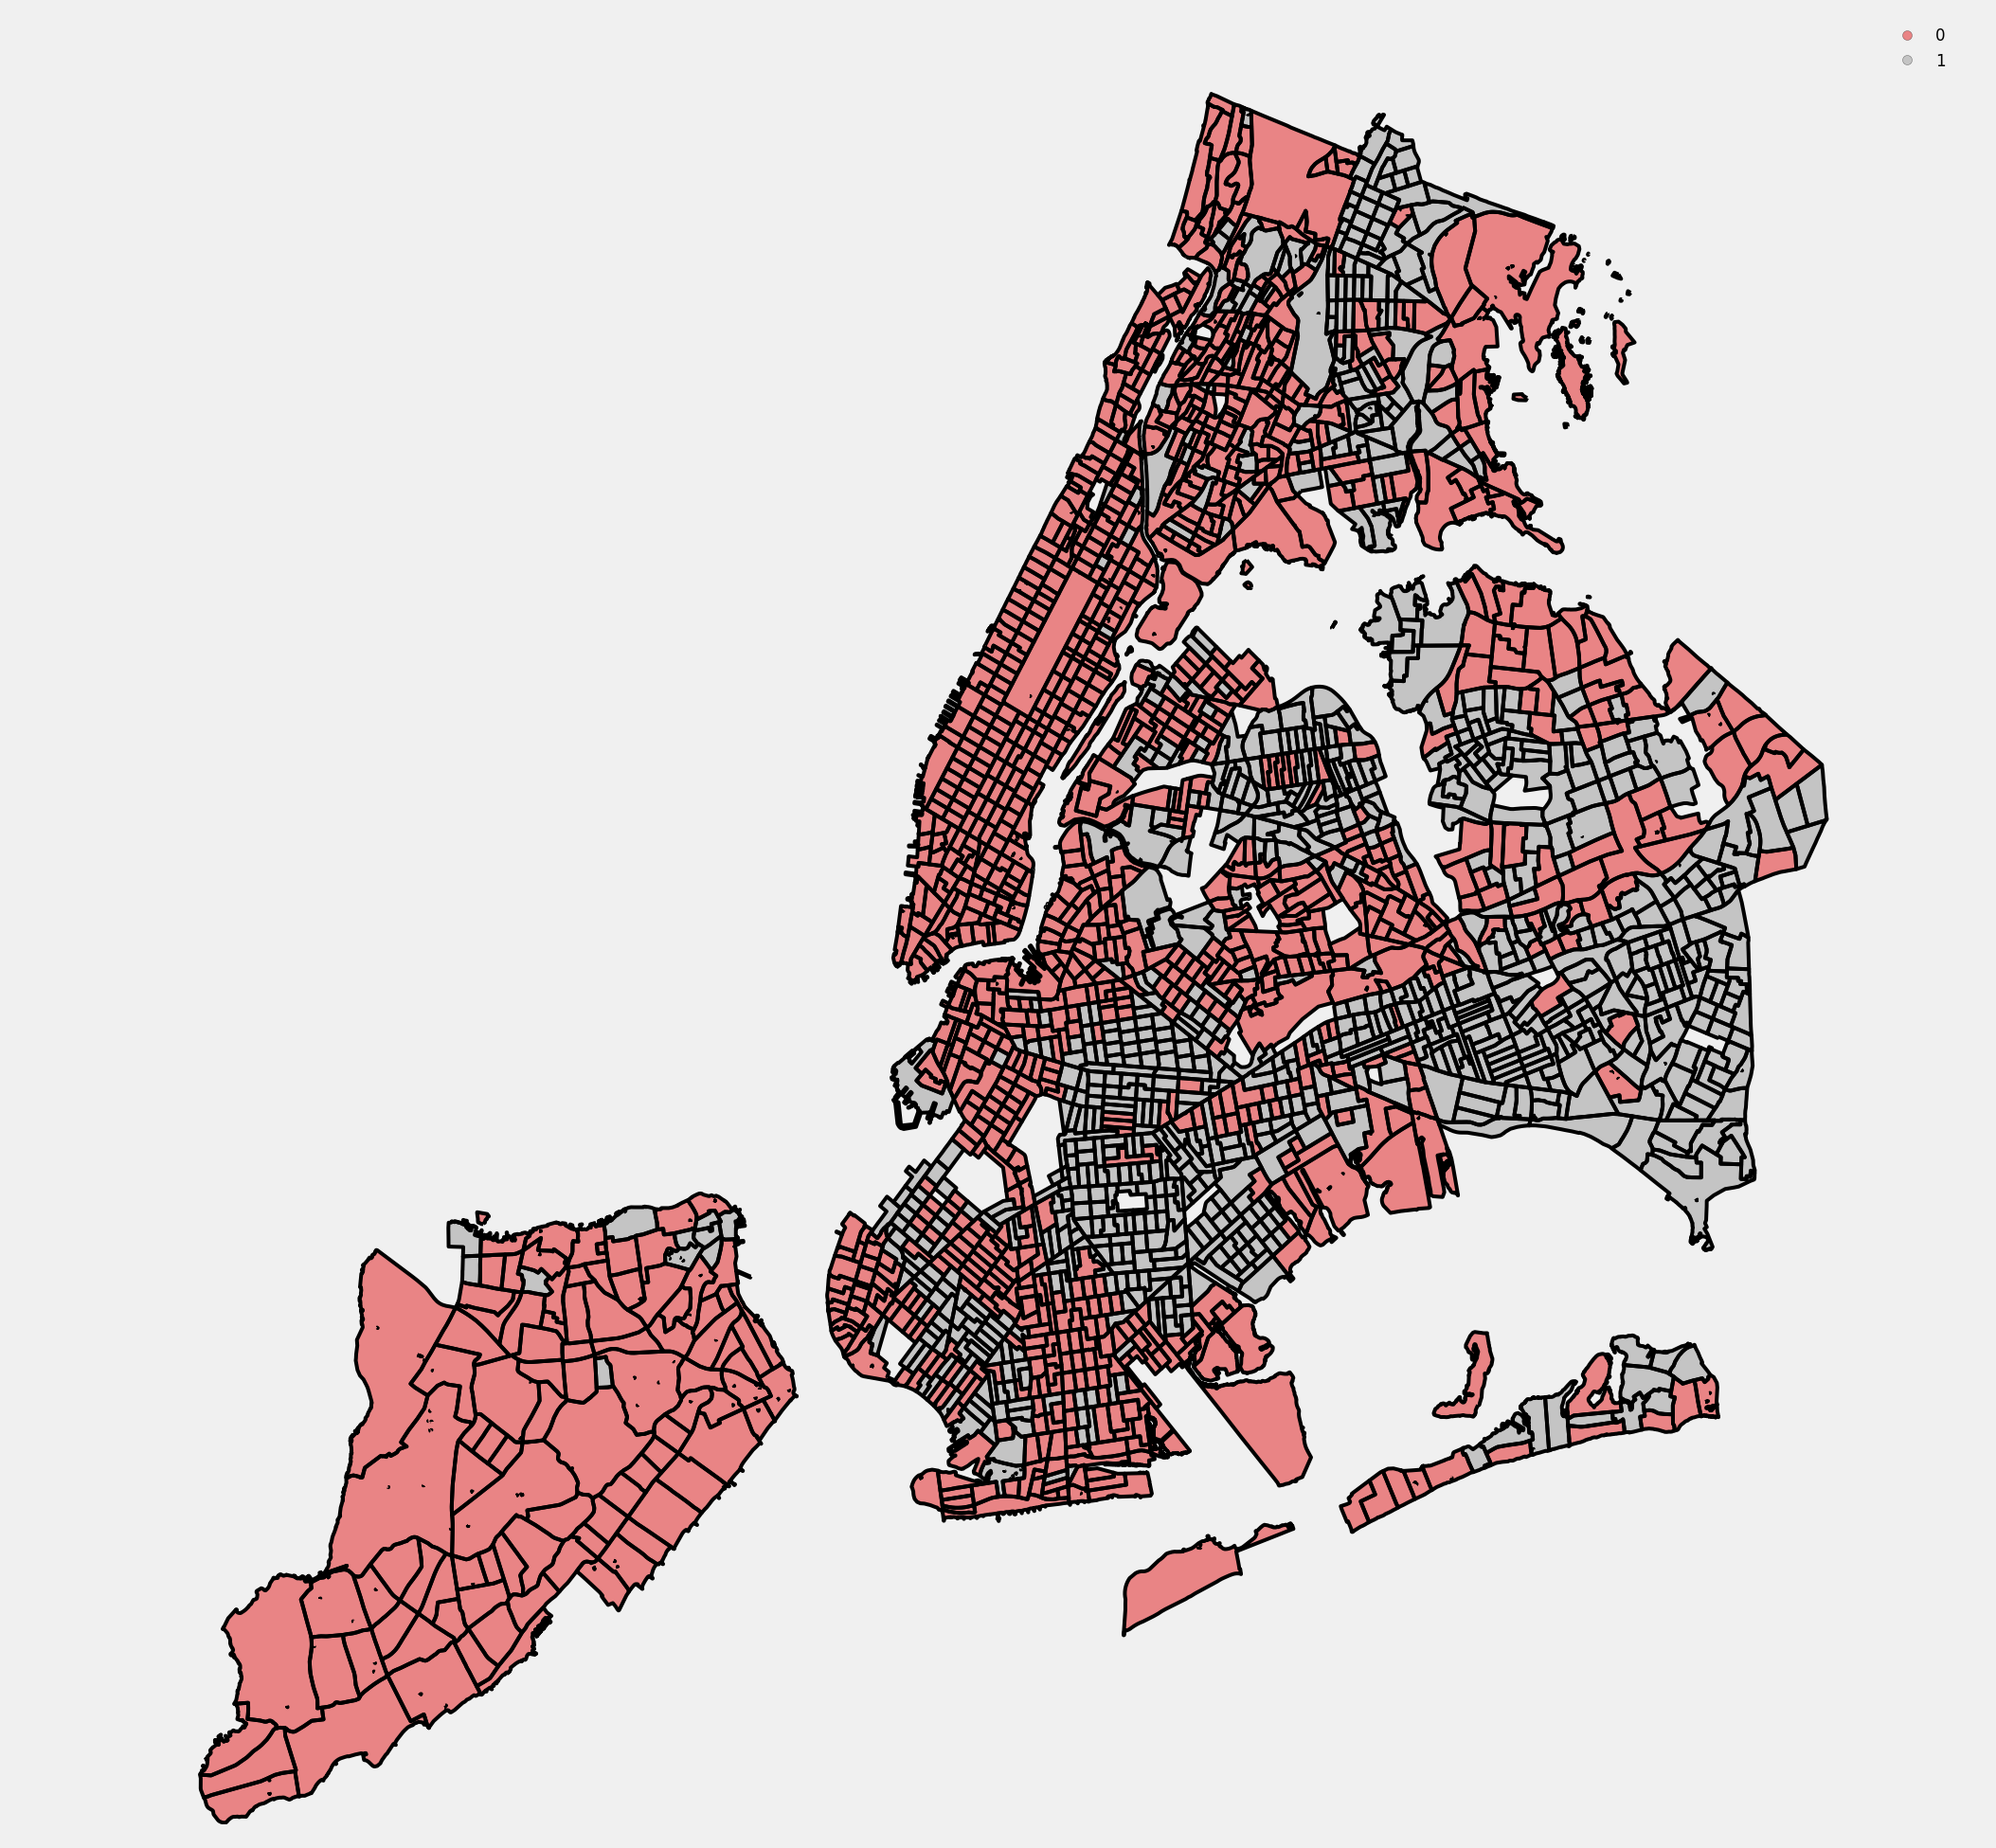

In [240]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='pred', legend=True, categorical=True)

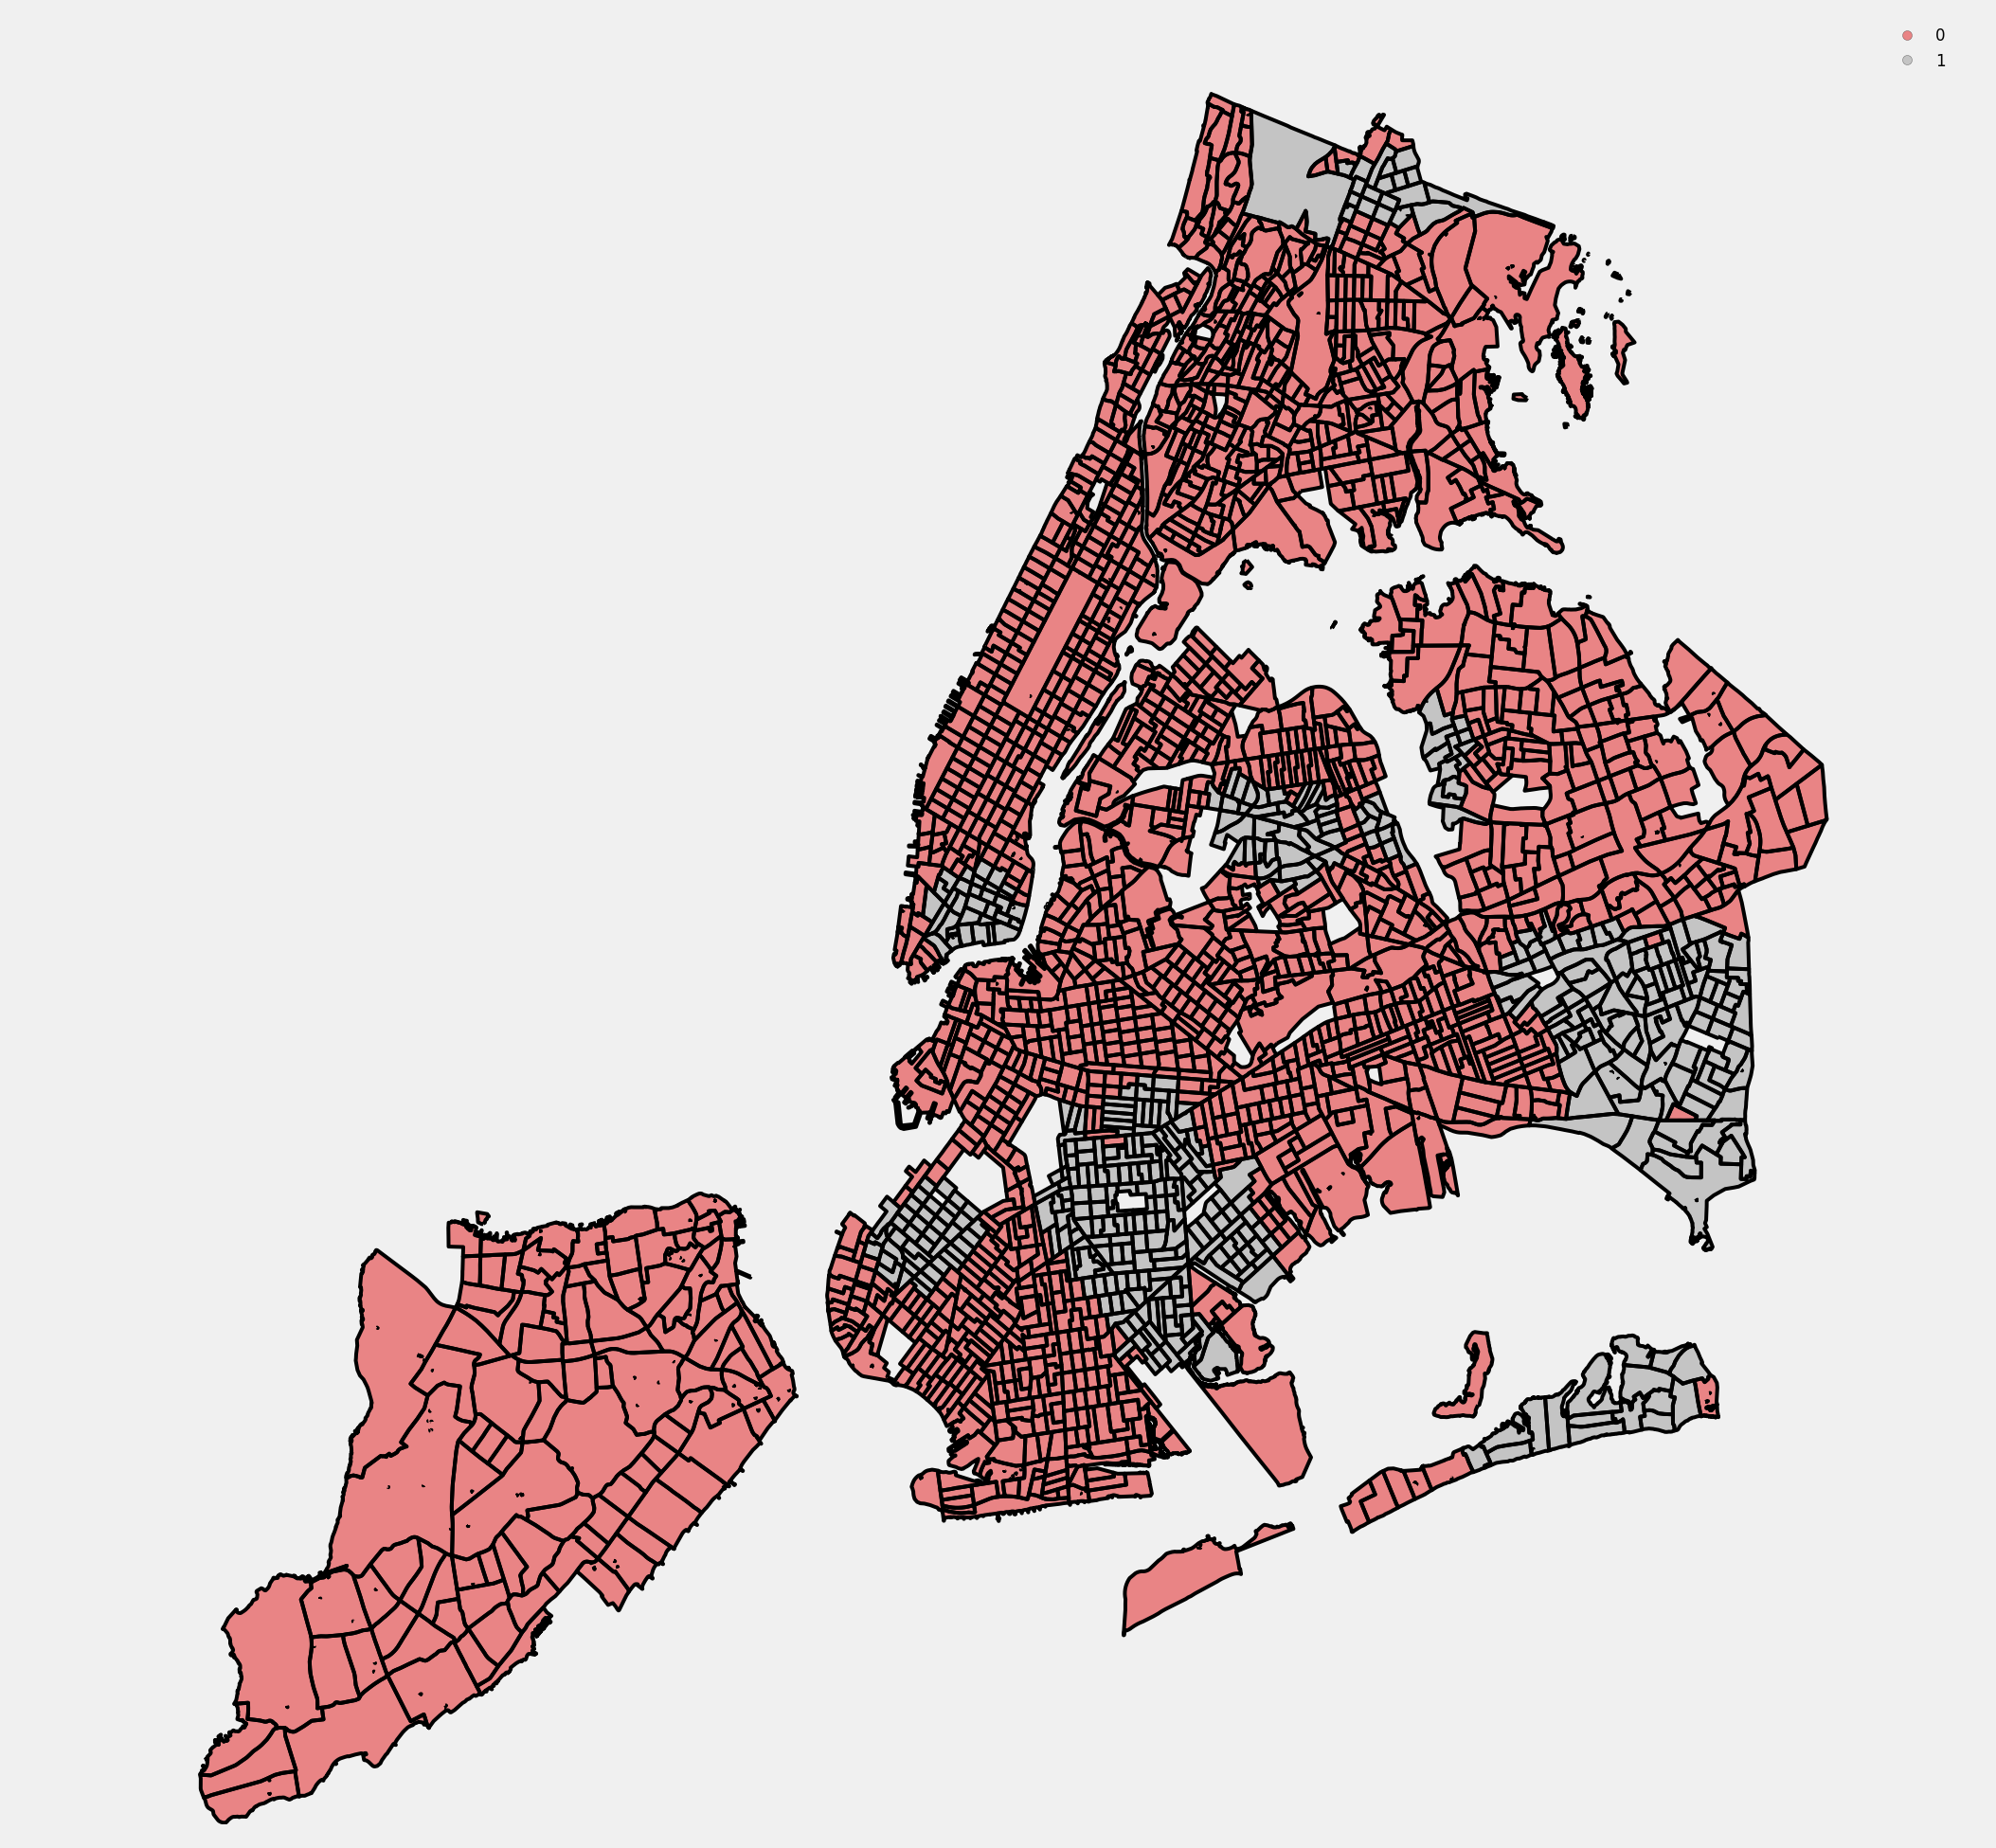

In [235]:
figure, ax = pl.subplots(figsize=(32,32))
ax.axis('off')
shp.plot(axes=ax, column='is_orig', legend=True, categorical=True)

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, class_weight={1: .2}, criterion='entropy')
rf.fit(train_data, train_target)
pred = rf.predict(test_data)
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.527397260274
% nonorigin misclassified = 0.0705244122966


In [295]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(2, weights='distance', p=2)
kn.fit(train_data, train_target)

pred = kn.predict(test_data)
print "% origin misclassified =", 1.*(test_target[test_target == 1] != pred[test_target == 1]).sum()/test_target[test_target == 1].shape[0]
print "% nonorigin misclassified =", 1.*(test_target[test_target == 0] != pred[test_target == 0]).sum()/test_target[test_target == 0].shape[0]

% origin misclassified = 0.397260273973
% nonorigin misclassified = 0.141048824593
